# Exploration of the Celeb A Dataset
Adamma Morrison
Oct 29, 2018

<img src="http://mmlab.ie.cuhk.edu.hk/projects/celeba/intro.png" alt="header" width="550">

## Background
Python programming language will be used to explore the Celeb A dataset.  This large dataset contains 202,599 images of faces and has been annotated with location of facial features and 40 attributes about each image. The attributes are descriptions of the faces, such as smiling, beared, attractive, male, etc. You can download the dataset [here](https://www.kaggle.com/jessicali9530/celeba-dataset/home) and read the original publication [here](https://arxiv.org/pdf/1509.06451.pdf).

## Import libraries and file
First import libraries and load `list_attr_celeba.csv`, the file that contains the 40 attributes about each image.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## We will load the file into a Pandas dataframe 
attr = pd.read_csv('list_attr_celeba.csv')

This file contains 202599 columns and 41 rows.  

In [73]:
attr.shape

(202599, 41)

Use `.head()` to see the top rows of the file.  The image ID is stored in the first column, and all of the attributes are defined as `1` for presence of trait and `-1` for absence of trait.

In [74]:
attr.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


## Seeing individual pictures.
The pictures are contained in the `img_align_celeba` folder.  Use the `get_picture` function defined below to display images.

In [75]:
from IPython.display import Image
from IPython.core.display import HTML 

def get_picture (rownumber):
    """This function will retrieve an image.  Enter the row of the image that you are looking for."""
    image_name = str(attr.iloc[rownumber, 0])
    image_location = str("img_align_celeba/" + image_name)
    print(image_name)
    return Image(url=image_location)

In [76]:
get_picture(1)

000002.jpg


## Explore the attributes
For ease of analysis the values will be recoded into `0` and `1`.  This will allow us to easily to easily see the percentages of pictures with each attribute.

In [77]:
attrRecode = attr.replace(-1, 0)
attrRecode.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


Use the `mean` command to find the percentage of images that have each trait.

In [78]:
round(100 * attrRecode.mean(), 2)

5_o_Clock_Shadow       11.11
Arched_Eyebrows        26.70
Attractive             51.25
Bags_Under_Eyes        20.46
Bald                    2.24
Bangs                  15.16
Big_Lips               24.08
Big_Nose               23.45
Black_Hair             23.93
Blond_Hair             14.80
Blurry                  5.09
Brown_Hair             20.52
Bushy_Eyebrows         14.22
Chubby                  5.76
Double_Chin             4.67
Eyeglasses              6.51
Goatee                  6.28
Gray_Hair               4.19
Heavy_Makeup           38.69
High_Cheekbones        45.50
Male                   41.68
Mouth_Slightly_Open    48.34
Mustache                4.15
Narrow_Eyes            11.51
No_Beard               83.49
Oval_Face              28.41
Pale_Skin               4.29
Pointy_Nose            27.74
Receding_Hairline       7.98
Rosy_Cheeks             6.57
Sideburns               5.65
Smiling                48.21
Straight_Hair          20.84
Wavy_Hair              31.96
Wearing_Earrin

The majority of the images in the database are of celebrities that are young.  Only 41% are male, which explains why  83% have no beard and only 7% are wearing a necktie.  

## Let's use a correlation analysis to see which attributes often occur together.

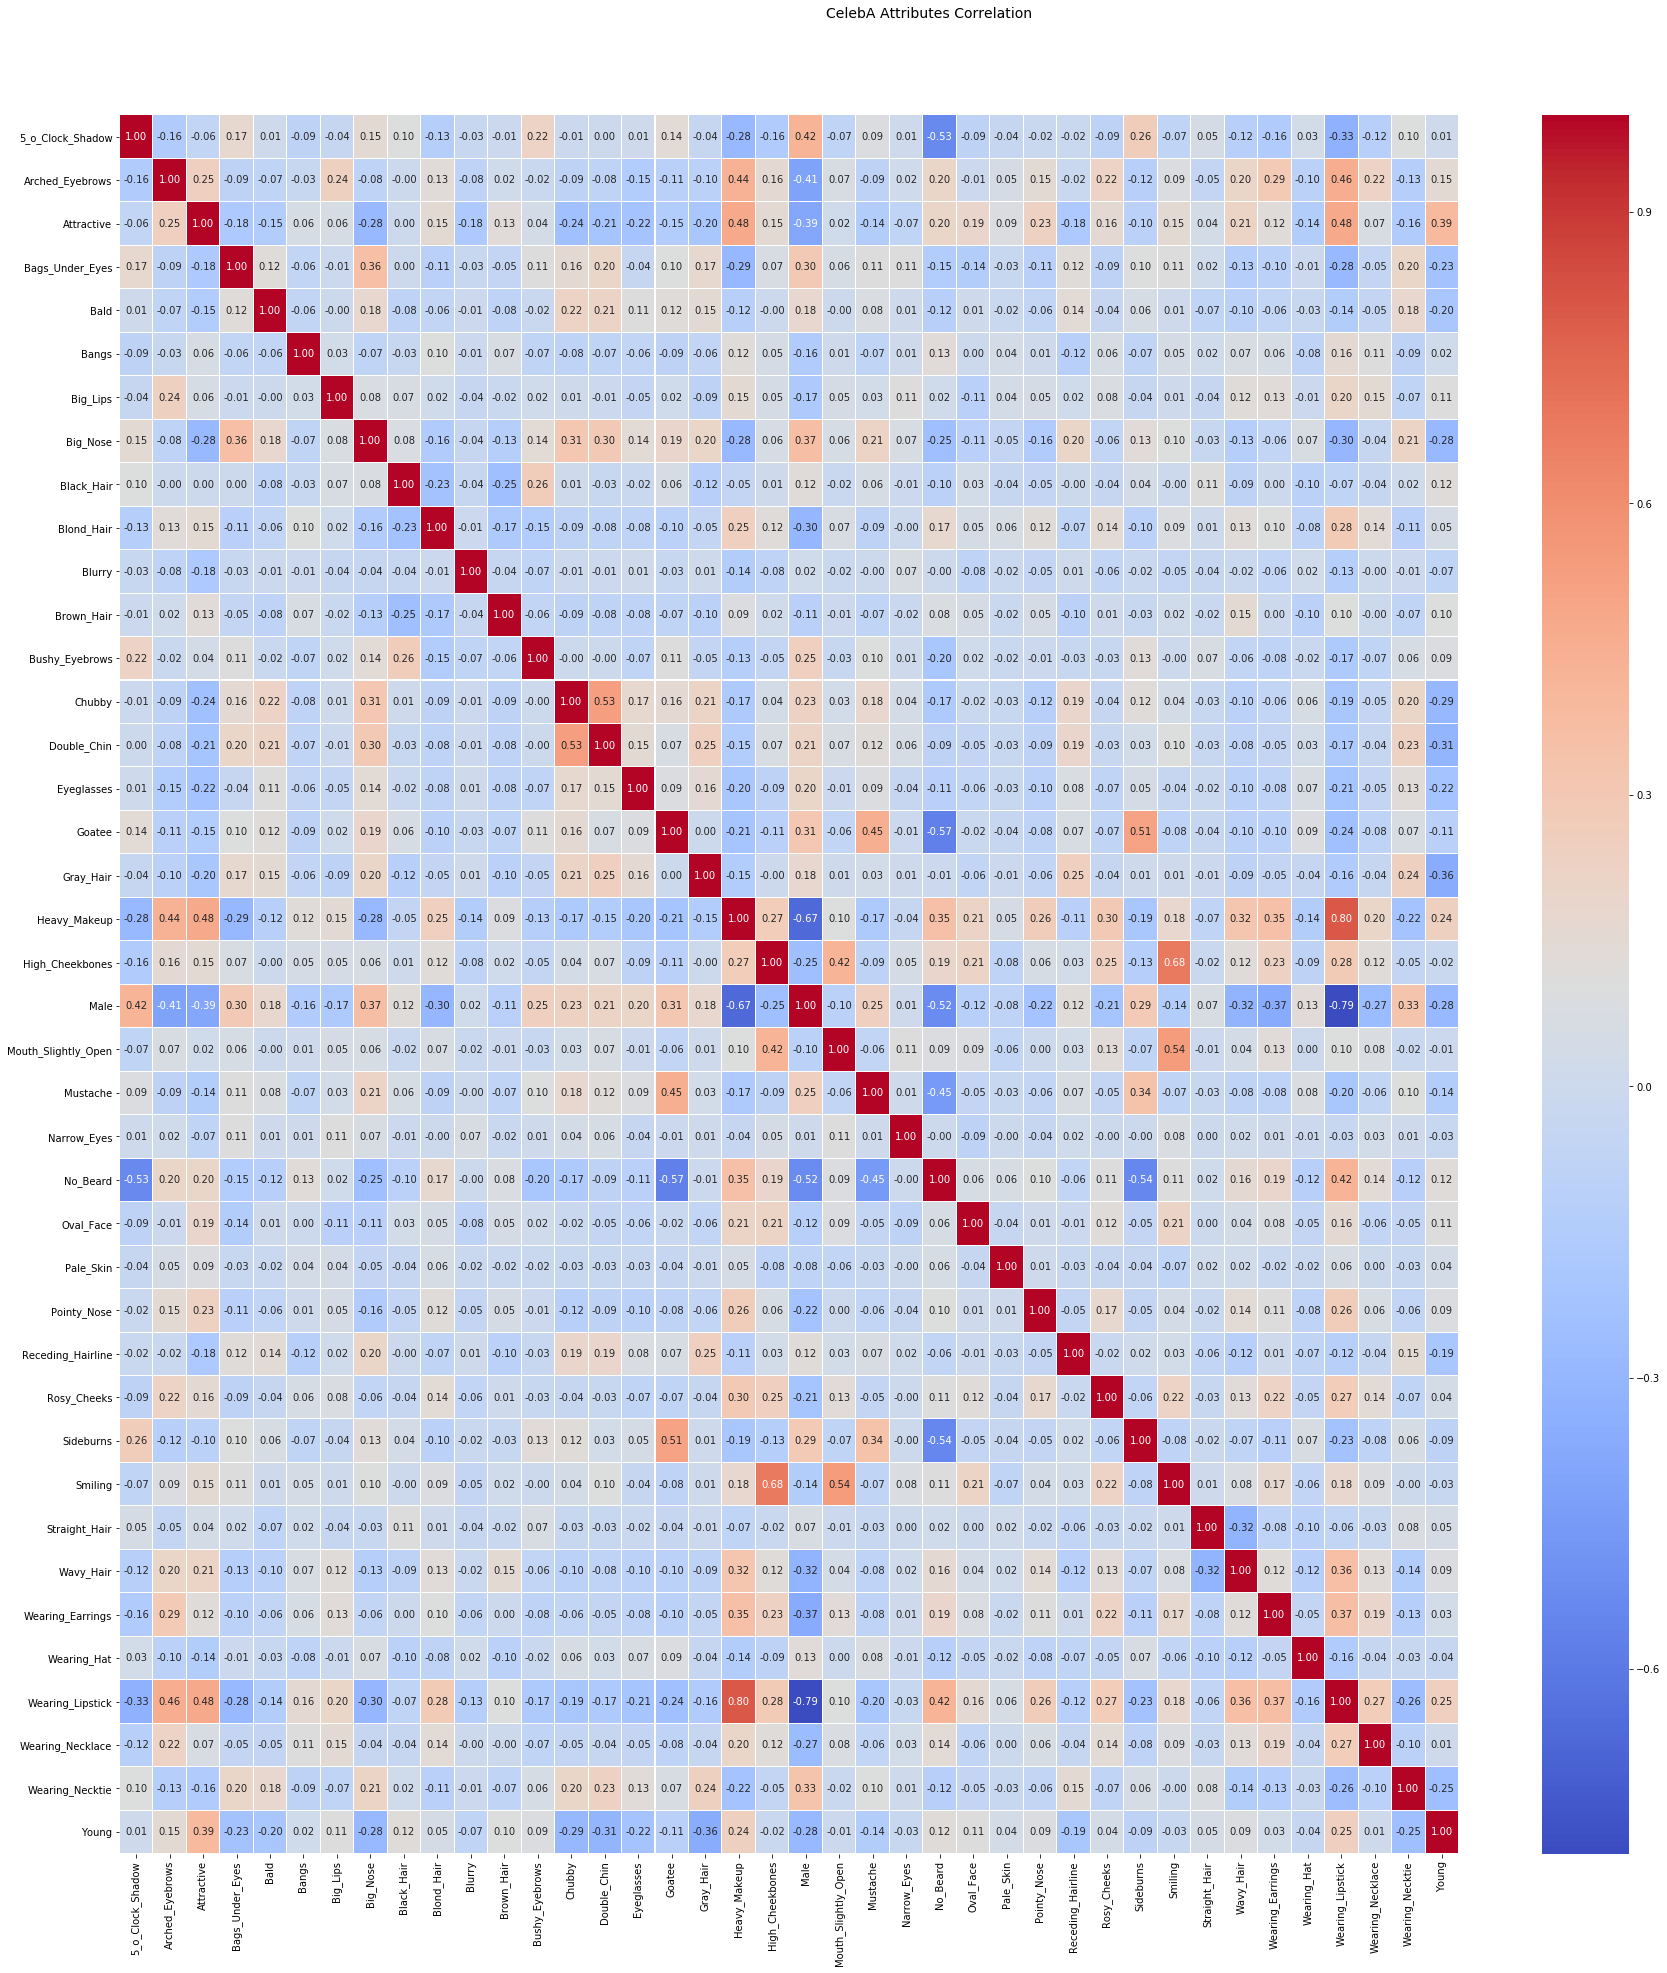

In [95]:
import seaborn as sns

f, ax = plt.subplots(figsize=(30, 30))
corr = attrRecode.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('CelebA Attributes Correlation', fontsize=14)

We can see that the trait attractive often occurs with heavy makeup and wearing lipstick, and is negatively correlatied with bags under eyes. 

Also, as expected, the trait of male is negatively correlated with wearing lipstick.  

Also smiling is associated with the trait high cheekbones.

Sideburns was positively correlated with having a goatee, but negatively correlated with having a beard.

## Visualizing the attributes with a histogram.
A histogram will allow us to quickly see how many attributes are unbalanced.

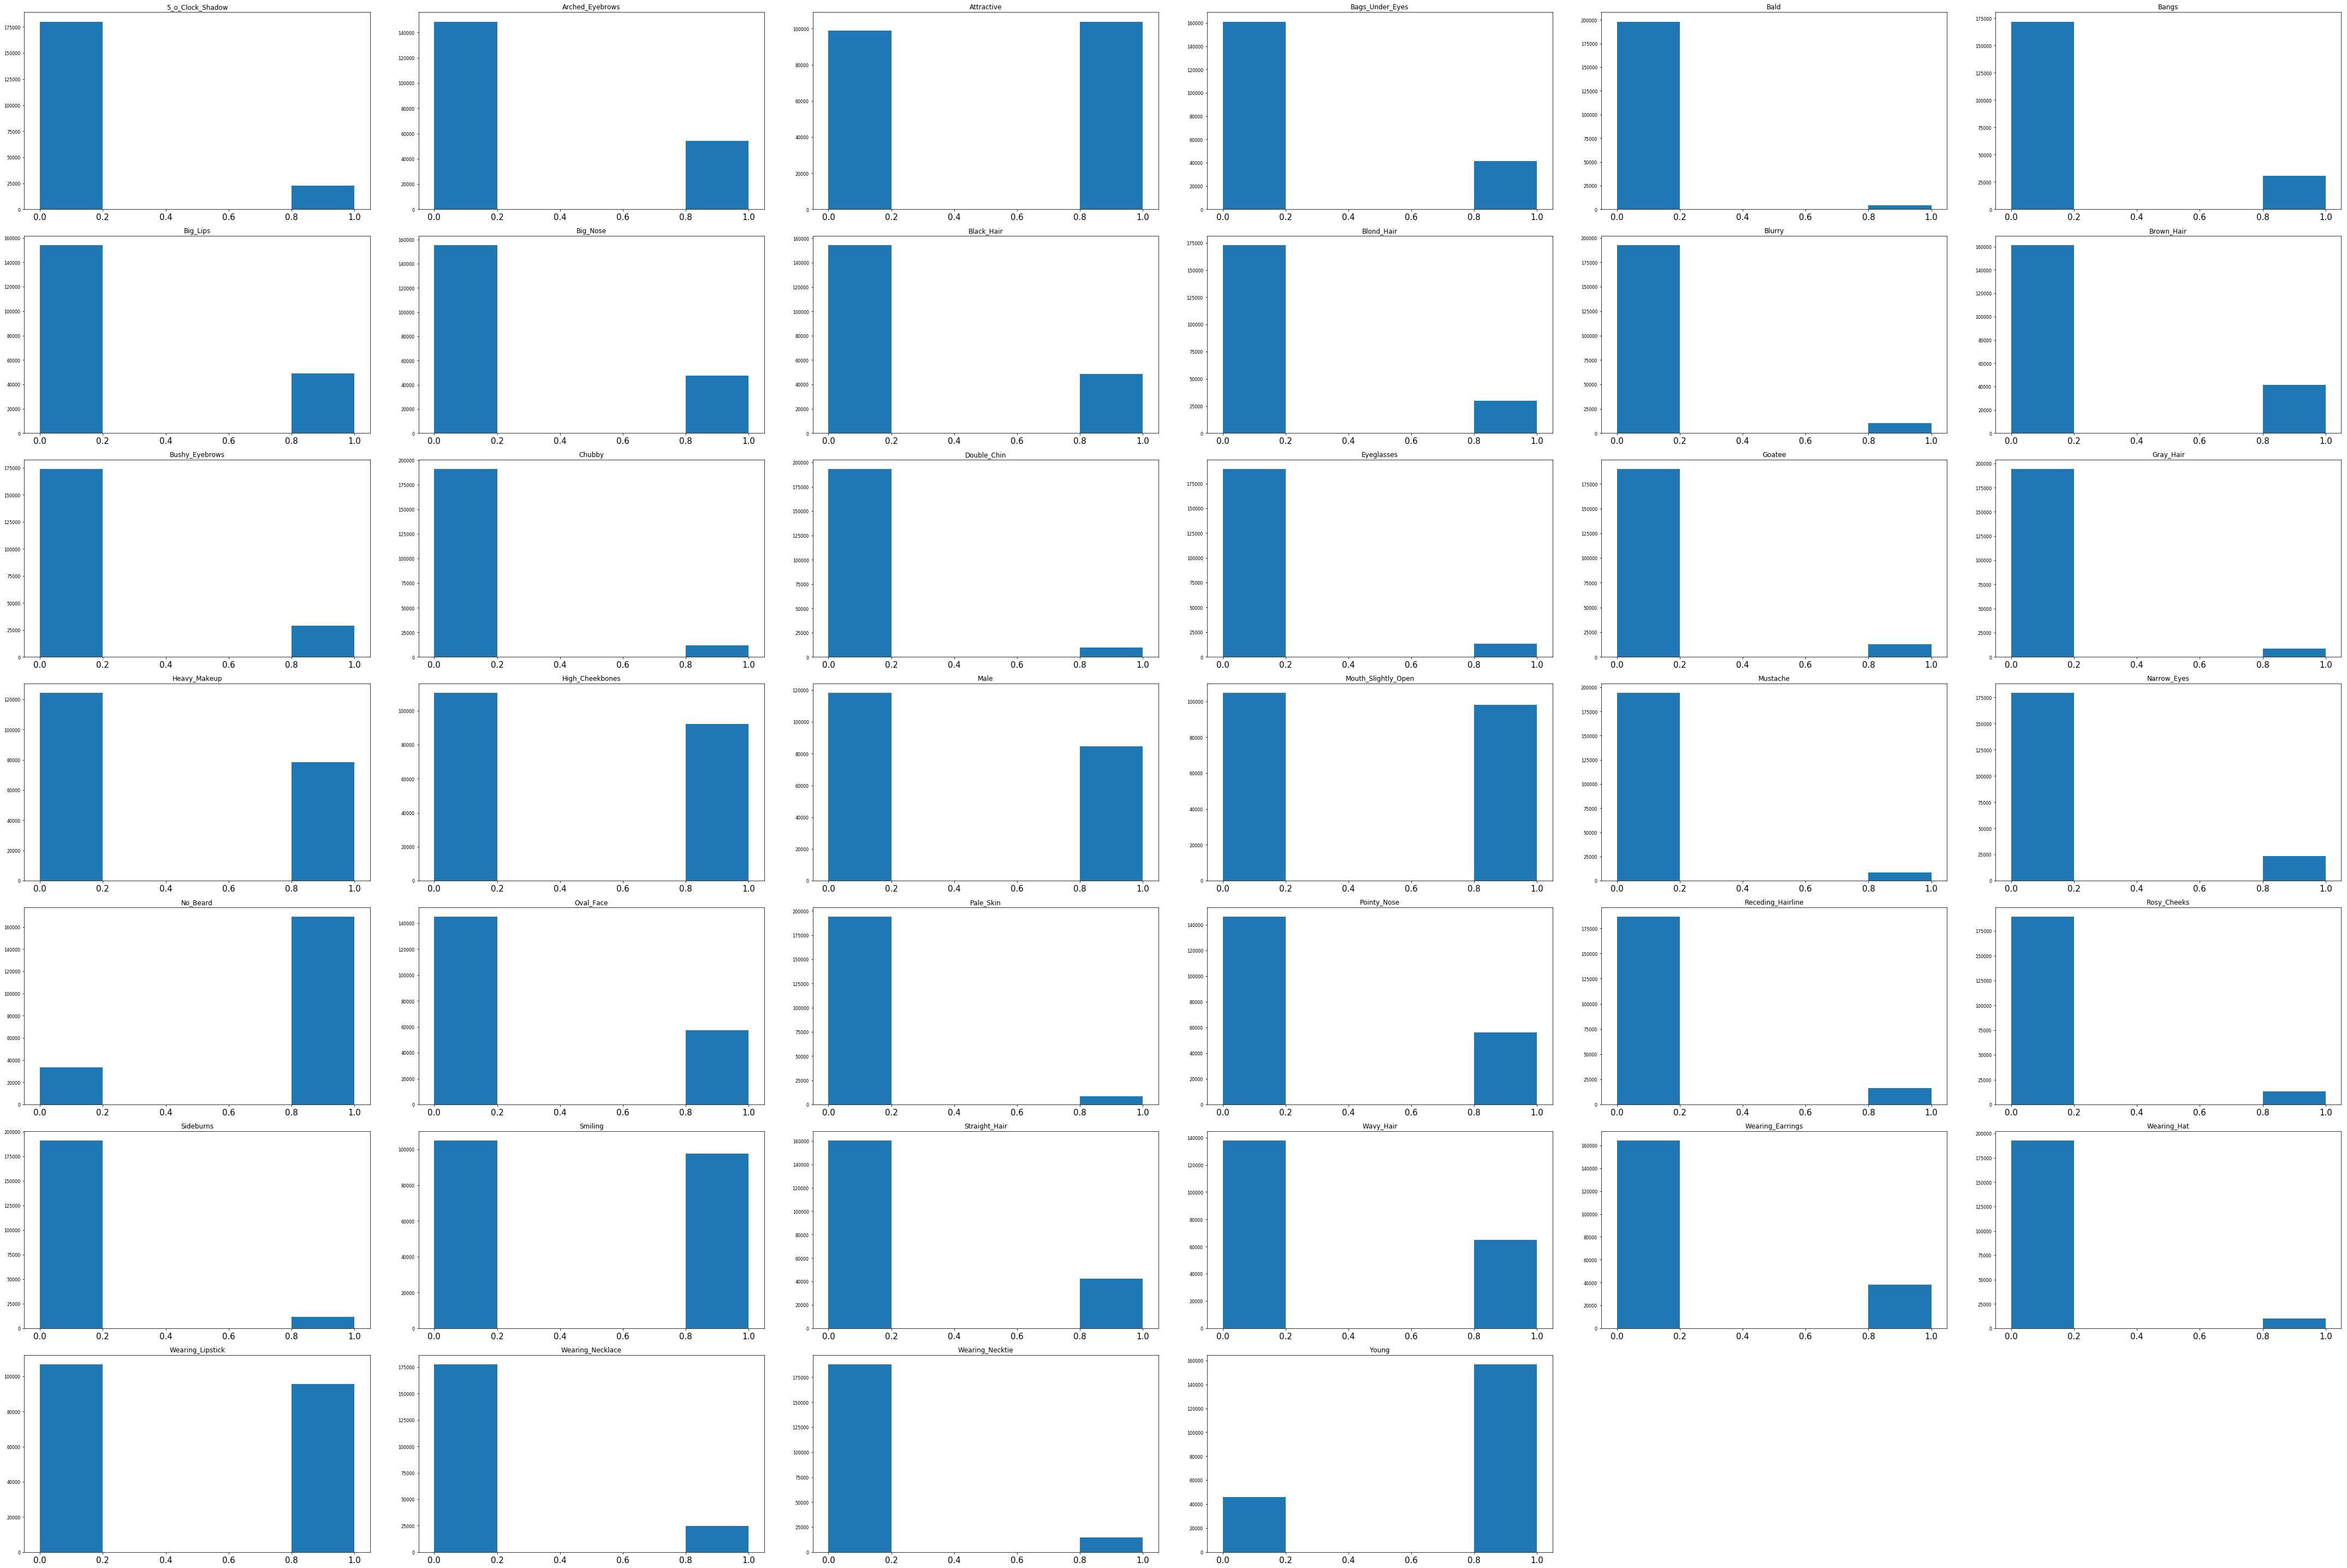

In [82]:
attrRecode.hist(bins=5, xlabelsize=15, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 10, 10))   

## Are there differences between the attractive and unattractive images?

First let's see an example of an attractive and unattractive image.

In [83]:
# For attractive and unattractive images, find random pictures
df = attrRecode[attrRecode.Attractive == 1] # only attractive images
attractiveRows = np.random.choice(df.index.values, 5)
df2 = attrRecode[attrRecode.Attractive == 0] # only unattractive images
unattractiveRows = np.random.choice(df2.index.values, 5)

In [84]:
get_picture2(attractiveRows[0])

In [85]:
get_picture(unattractiveRows[0])

187507.jpg


Next let's look at the attribute means for the two groups.

In [86]:
attrRecode.groupby('Attractive').mean()

,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
Attractive,,,,,,,,,,,,,,,,,,,,,
0,0.131250,0.153312,0.278385,0.044590,0.12962,0.213373,0.354899,0.237440,0.091641,0.091681,...,0.080240,0.406334,0.191098,0.216775,0.139015,0.078985,0.226677,0.099822,0.114361,0.607243
1,0.092004,0.375102,0.134360,0.001377,0.17246,0.266880,0.120039,0.240973,0.201593,0.012106,...,0.033939,0.554130,0.224861,0.417343,0.236399,0.019425,0.706201,0.144983,0.033101,0.931871


We can see that attractive images are more likely to be young and wearing lipstick.  70% of the attractive images are wearing lipstick, and 93% are young.  